# Unpaired two-sample t-test

## Libraries and settings

In [23]:
# Libraries
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

# Settings for seaborn
sns.set_theme(style="ticks", palette="pastel")

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Show current working directory
print(os.getcwd())

/workspaces/data_analytics/Week_06


## Read example data (used car data)

In [24]:
df = pd.read_excel('t-tests_and_ANOVA.xlsx', sheet_name='t-test_data')

# Show categories of 'Make'
print(df['Marke'].value_counts())

# Show first rows in dataframe
df.head()

Marke
VW     20
BMW    20
Name: count, dtype: int64


,Marke,Price
0,VW,29000
1,VW,38000
2,VW,33000
3,VW,64000
4,VW,52000


## Create grouped boxplot (groups = make, values = car prices)

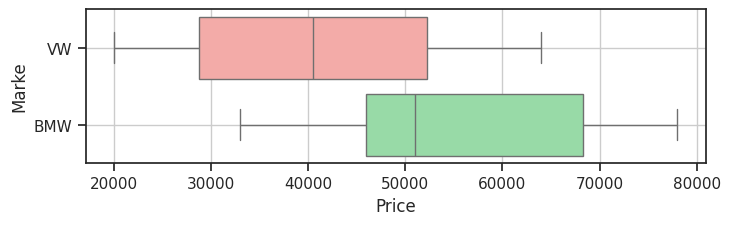

In [25]:
# Plot boxplot with groups
plt.figure(figsize=(8,2))
ax = sns.boxplot(x="Price",
                 y="Marke",
                 palette=['r', 'g'],
                 data=df,
                 orient='h')
plt.grid()
plt.show()

## Unpaired two-sample t-test

In [26]:
# Create subsets (groups) -> für t-test müssen wir gruppen machen = 2 neue data frames
vw = df.loc[df['Marke'] == 'VW']
bmw = df.loc[df['Marke'] == 'BMW']

# Create t-test
result = stats.ttest_ind(vw['Price'], bmw['Price'])

# Print result
print('Test-statistic:', result[0].round(5), 'p-value',  result[1].round(5))

Test-statistic: -2.69607 p-value 0.0104


## Interpretation of result

<p> Because the p-value is lower than 0.05, the null hypothesis can be rejected, i.e. there is evidence that the used car prices of VW, BMW differ. Note that, from the t-test above, it is not clear which brand show higher or lower prices. It only shows that there is a statistically significant (5% significance level) difference between prices.</p>

## Importing apartment data

In [27]:
# Read the data to a pandas data frame
df = pd.read_csv('apartments_data_enriched_cleaned.csv', 
                 sep=';', 
                 encoding='utf-8')[['web-scraper-order',
                                    'address_raw',
                                    'lat',
                                    'lon',
                                    'bfs_number',
                                    'bfs_name',
                                    'rooms', 
                                    'area', 
                                    'luxurious', 
                                    'price', 
                                    'price_per_m2',
                                    'pop_dens',
                                    'frg_pct',
                                    'mean_taxable_income',
                                    'dist_supermarket']]

# Get number of rows and columns
print(df.shape)

# Show first records
df.head(5)

(774, 15)


,web-scraper-order,address_raw,lat,lon,bfs_number,bfs_name,rooms,area,luxurious,price,price_per_m2,pop_dens,frg_pct,mean_taxable_income,dist_supermarket
0,1693998201-1,"Neuhusstrasse 6, 8630 Rüti ZH, ZH",47.252171,8.845797,118,Rüti (ZH),3.0,49,0,1441,29.41,1221.272366,24.841283,65362.04268,645.652248
1,1693998233-172,"Widacherstrasse 5, 8630 Rüti ZH, ZH",47.252087,8.854919,118,Rüti (ZH),3.0,111,0,2600,23.42,1221.272366,24.841283,65362.04268,265.102153
2,1693998256-331,"Widenweg 14, 8630 Rüti ZH, ZH",47.253670,8.853993,118,Rüti (ZH),3.0,58,0,1490,25.69,1221.272366,24.841283,65362.04268,94.401821
3,1693998265-381,"Rain 1, 8630 Rüti ZH, ZH",47.259834,8.851705,118,Rüti (ZH),4.0,118,0,3240,27.46,1221.272366,24.841283,65362.04268,106.660970
4,1693998276-419,"Bachtelstrasse 24b, 8630 Rüti ZH, ZH",47.266113,8.866872,118,Rüti (ZH),3.0,66,0,1450,21.97,1221.272366,24.841283,65362.04268,974.844209


## Create new binary variable with densely populated and all other municipalities

In [28]:
df['pop_dens_binary'] = (df['pop_dens'] >= 1000).astype(int)
df.head(5)

,web-scraper-order,address_raw,lat,lon,bfs_number,bfs_name,rooms,area,luxurious,price,price_per_m2,pop_dens,frg_pct,mean_taxable_income,dist_supermarket,pop_dens_binary
0,1693998201-1,"Neuhusstrasse 6, 8630 Rüti ZH, ZH",47.252171,8.845797,118,Rüti (ZH),3.0,49,0,1441,29.41,1221.272366,24.841283,65362.04268,645.652248,1
1,1693998233-172,"Widacherstrasse 5, 8630 Rüti ZH, ZH",47.252087,8.854919,118,Rüti (ZH),3.0,111,0,2600,23.42,1221.272366,24.841283,65362.04268,265.102153,1
2,1693998256-331,"Widenweg 14, 8630 Rüti ZH, ZH",47.253670,8.853993,118,Rüti (ZH),3.0,58,0,1490,25.69,1221.272366,24.841283,65362.04268,94.401821,1
3,1693998265-381,"Rain 1, 8630 Rüti ZH, ZH",47.259834,8.851705,118,Rüti (ZH),4.0,118,0,3240,27.46,1221.272366,24.841283,65362.04268,106.660970,1
4,1693998276-419,"Bachtelstrasse 24b, 8630 Rüti ZH, ZH",47.266113,8.866872,118,Rüti (ZH),3.0,66,0,1450,21.97,1221.272366,24.841283,65362.04268,974.844209,1


## Create pivot table with mean price_per_m2

In [29]:
# Using pivot_table to reshape the data and calculate means 
pd.pivot_table(df[['pop_dens_binary', 'price_per_m2']],
               index=['pop_dens_binary'],
               values=['price_per_m2'],
               aggfunc=[np.mean, 'count'])

,mean,count
,price_per_m2,price_per_m2
pop_dens_binary,,
0,24.367444,180
1,35.430657,594


## Create grouped boxplot (groups = pop_dens_binary, values = prices_per_m2)

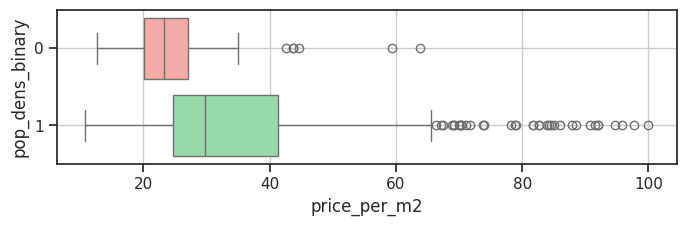

In [30]:
# Plot boxplot with groups
plt.figure(figsize=(8,2))
ax = sns.boxplot(x="price_per_m2",
                 y="pop_dens_binary",
                 data=df,
                 palette=['r', 'g'],
                 orient='h')
plt.grid()
plt.show()

## Unpaired two-sample t-test

In [31]:
# Create subsets (groups)
densely_populated = df.loc[df['pop_dens_binary'] == 0]
not_densely_populated = df.loc[df['pop_dens_binary'] == 1]

# Create t-test
result = stats.ttest_ind(densely_populated['price_per_m2'], 
                         not_densely_populated['price_per_m2'])

# Print result
print('Test-statistic:', result[0].round(5), 'p-value',  result[1].round(5)) #auf 5 stellen gerundet



#diese 2 durchschnitte sind verschieden. 

Test-statistic: -9.19477 p-value 0.0


### Interpretation of result

<p> Because the p-value is lower than 0.05, the null hypothesis can be rejected, i.e. there is evidence that the prices per m2 differ between densely populated and other municipalities. Note that, from the t-test above, it is not clear which group of municipalities show lower or higher prices. It only shows that there is a statistically significant (5% significance level) difference between prices.</p>

## Compare rental apartment prices in the cities of Winterthur and Zuerich

### prices per m2 of rental apartmentst-test

Perform an unpaired two-sample t-test based on the two samples to investigate,
whether the prices per m2 of rental apartments differ between the cities of
Winterthur and Zuerich. Use a significance level of 5%.

In [32]:
# subsets

df_winti = df.loc[df['bfs_name'] == 'Winterthur']['price_per_m2']
df_zueri = df.loc[df['bfs_name'] == 'Zürich']['price_per_m2']

# t-test
result = stats.ttest_ind(df_winti, df_zueri)

# print
print('Test-statistic:', result[0].round(5), 'p-value',  result[1].round(5))

# interpretation
alpha = 0.05
if result.pvalue < alpha:
    print("Die Preise pro m² von Mietwohnungen unterscheiden sich signifikant zwischen Winterthur und Zürich (p < 0.05).")
else:
    print("Es gibt keinen signifikanten Unterschied in den Preisen pro m² von Mietwohnungen zwischen Winterthur und Zürich (p >= 0.05).")


Test-statistic: -10.78628 p-value 0.0
Die Preise pro m² von Mietwohnungen unterscheiden sich signifikant zwischen Winterthur und Zürich (p < 0.05).


### Jupyter notebook --footer info-- (please always provide this at the end of each submitted notebook)

In [33]:
import os
import platform
import socket
from platform import python_version
from datetime import datetime

print('-----------------------------------')
print(os.name.upper())
print(platform.system(), '|', platform.release())
print('Datetime:', datetime.now().strftime("%Y-%m-%d %H:%M:%S"))
print('Python Version:', python_version())
print('-----------------------------------')

-----------------------------------
POSIX
Linux | 6.5.0-1025-azure
Datetime: 2024-10-23 13:19:53
Python Version: 3.11.10
-----------------------------------
